In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

%matplotlib inline
sns.set_context("poster")

In [2]:
df = pd.read_csv("data/Resultados_alineamiento_barcoding_secuencia.csv")
df['qscore_l'] = df.qscore.str[:1].astype('int')

In [3]:
df_s = df.loc[df.qscore_l >= 5, ["secuencia", "barcoding_IGA", "barcoding_IGG", "barcoding_IGM", "barcoding_IGK", "barcoding_IGL", "qscore", "qscore_l"]]

In [4]:
df_s_l = pd.melt(df_s, id_vars=["secuencia", "qscore", "qscore_l"])
df_s_l = df_s_l[df_s_l.value == "Si"]

In [5]:
df_summ = pd.DataFrame(df_s_l.groupby(["variable", "qscore"]).size()).reset_index()
df_summ['variable'] = df_summ['variable'].str.replace("barcoding_", "")

df_summ.columns = ["IG Chain", "QScore", "n"]

In [6]:
ig_order = {'IGA': 1, 'IGG': 2, 'IGM': 3, 'IGK': 4, 'IGL': 5}
df_summ['ig_sort'] = df_summ["IG Chain"].apply(lambda x: ig_order[x])

In [7]:
df_summ = df_summ.sort_values(["QScore", "ig_sort"], ascending=[False, True])

In [8]:
df_summ_qs = df_summ.groupby("QScore").agg({'n': 'sum'}).sort_values("QScore", ascending = False)

In [9]:
df_summ

,IG Chain,QScore,n,ig_sort
4,IGA,9 <= QS,872,1
9,IGG,9 <= QS,414,2
24,IGM,9 <= QS,862,3
14,IGK,9 <= QS,1846,4
19,IGL,9 <= QS,623,5
3,IGA,8 <= QS < 9,7351,1
8,IGG,8 <= QS < 9,3334,2
23,IGM,8 <= QS < 9,6448,3
13,IGK,8 <= QS < 9,11322,4
18,IGL,8 <= QS < 9,6666,5


In [10]:
greys = [plt.cm.Greys(x/10) for x in range(8, 3, -1)]
palette = ["#74a345", "#49ad8b", "#568ccf", "#c9613b", "#c18e41"]

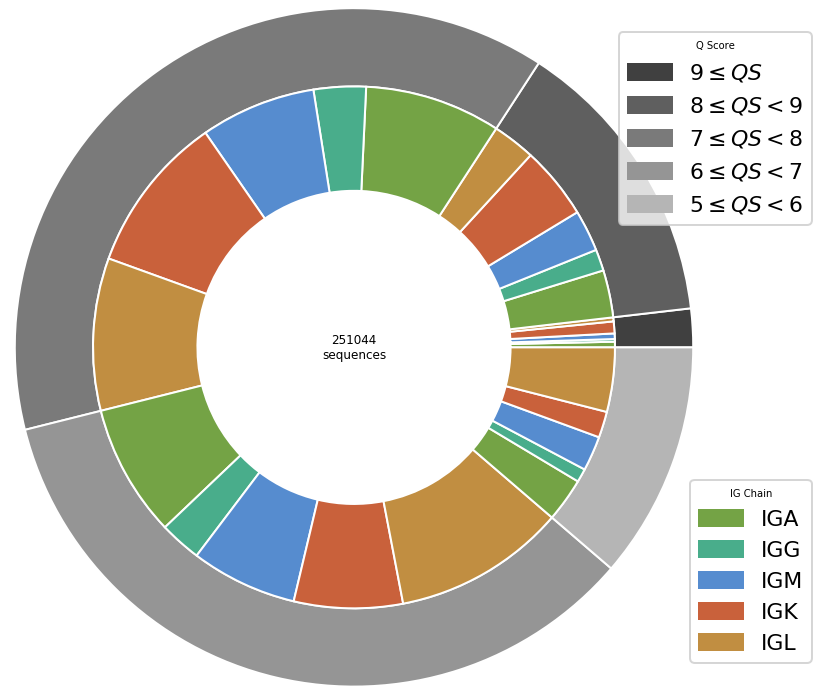

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('equal')
# outer ring
mypie, _ = ax.pie(df_summ_qs, radius=1.3, labels=None, labeldistance=0.88, colors=greys,
                  textprops=dict(size = 13, color="w", weight="bold", ha="center"))
plt.setp(mypie, width=0.3, edgecolor='white')
# inner ring
mypie2, _ = ax.pie(df_summ.n, radius=1.3-0.3, labels=None, labeldistance=0.8, colors=palette)
plt.setp(mypie2, width=0.4, edgecolor='white')

# text inside
ax.text(0, 0, "{}\nsequences".format(df_summ.n.sum()), fontdict = dict(size = "large", ha = "center", va = "center"))

# IG Chain legend
ig_legend = plt.legend([Patch(color = x) for x in palette],
                       df_summ["IG Chain"].unique(),
                       bbox_to_anchor=(1.2, 0), loc="lower right", title = "IG Chain")
ax = plt.gca().add_artist(ig_legend)
# Q Score legend
plt.legend([Patch(color = x) for x in greys],
           ["${}$".format(x.replace("<=", "\leq")) for x in df_summ["QScore"].unique()],
           bbox_to_anchor=(1.2, 1), loc="upper right", title = "Q Score")

In [12]:
fig.savefig("figs/ig_qs_donut.pdf", bbox_inches='tight')

In [13]:
vd_comb = pd.read_csv("data/vd_comb.csv")

In [14]:
vd_comb_w = vd_comb.pivot("IGHD", "IGHV", "proportion")

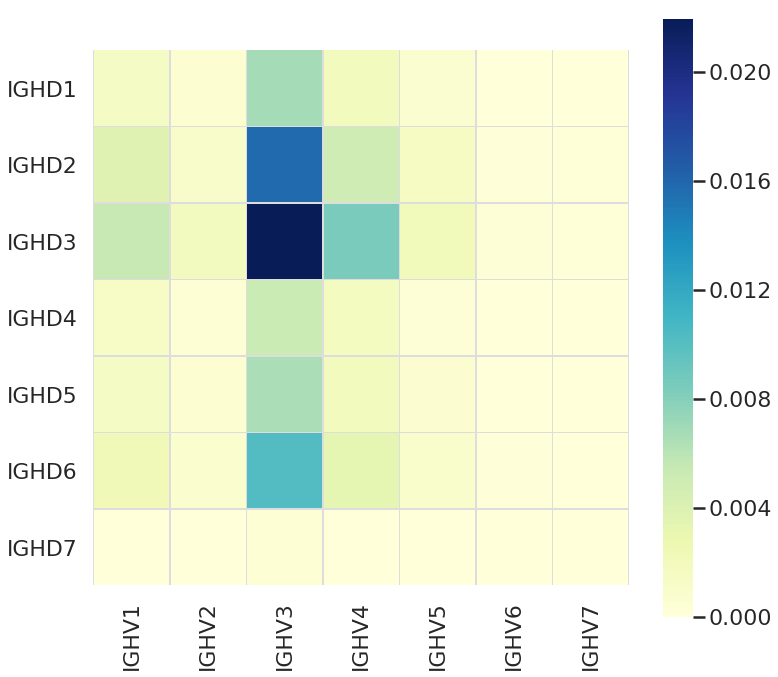

In [15]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 11))
    ax = sns.heatmap(vd_comb_w, cmap="YlGnBu", linewidths=.5, linecolor="#DDDDDD", square=True)
    ax.set(xlabel = '', ylabel = '')
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)

In [16]:
fig.savefig("figs/ig_heatmap.pdf", bbox_inches='tight')